In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import lda_functions
import sentences
import bert_embed

In [4]:
generator = sentences.SentenceGenerator()
topics = ['trees', 'binary_trees', 'healthcare', 'economics']

documents = generator.generate_documents(topics, num_documents = 2000, sentences_per_doc = 2)
generator.save_sentences(documents, 'documents_2000_2sentences.txt')

In [5]:
lda_trainer = lda_functions.LDAModelTrainer(documents)
    


In [6]:
# Preprocess documents
processed_docs = lda_trainer.preprocess()

In [7]:
# Find optimal number of topics with metrics
eval_metrics = lda_trainer.find_optimal_topics(passes = 25)

2024-11-27 10:32:33,796 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-11-27 10:32:33,821 : INFO : built Dictionary<289 unique tokens: ['advanced', 'care', 'environmental', 'explore', 'genetic']...> from 2000 documents (total 29608 corpus positions)
2024-11-27 10:32:33,821 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<289 unique tokens: ['advanced', 'care', 'environmental', 'explore', 'genetic']...> from 2000 documents (total 29608 corpus positions)", 'datetime': '2024-11-27T10:32:33.821444', 'gensim': '4.3.3', 'python': '3.11.5 (main, Dec 11 2023, 14:00:05) [GCC 8.5.0 20210514 (Red Hat 8.5.0-20)]', 'platform': 'Linux-4.18.0-553.8.1.el8_10.x86_64-x86_64-with-glibc2.28', 'event': 'created'}
2024-11-27 10:32:33,822 : INFO : discarding 1 tokens: [('tree', 1033)]...
2024-11-27 10:32:33,822 : INFO : keeping 288 tokens which were in no less than 2 and no more than 1000 (=50.0%) documents
2024-11-27 10:32:33,823 : INFO : resulting dictionary: Dictionary<28

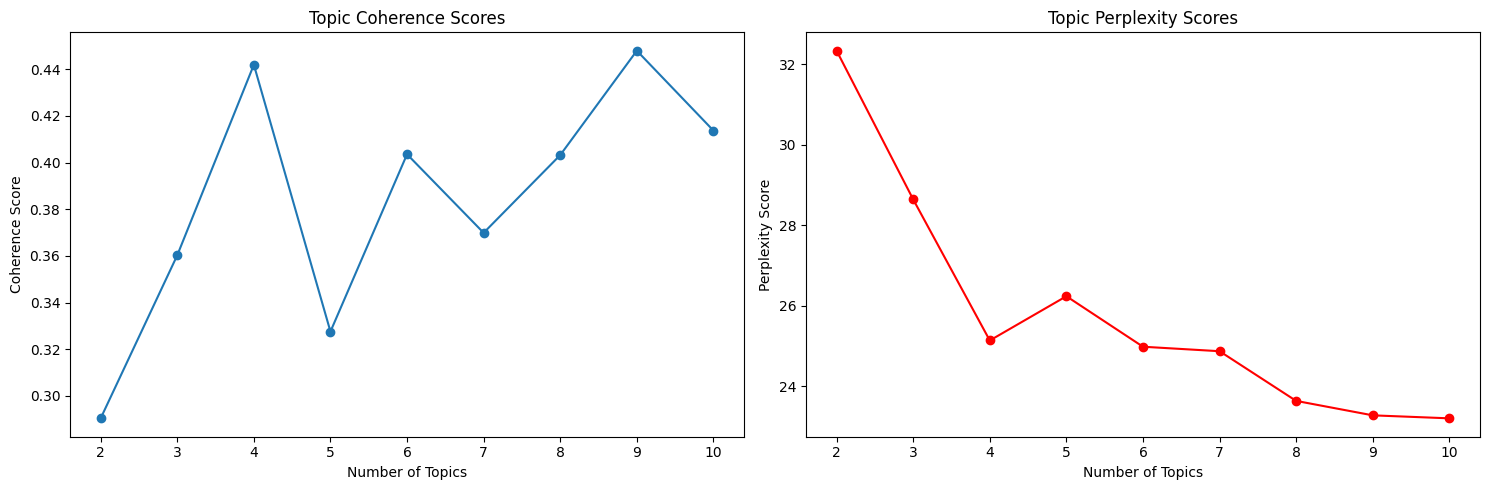

In [8]:
# Plot topic metrics
lda_trainer.plot_topic_metrics()

In [9]:
# Get optimal number of topics
optimal_topics = lda_trainer.get_optimal_topics()
print(f"Optimal number of topics: {optimal_topics}")

Optimal number of topics: 9


In [44]:
# Train final model with optimal topics
final_model = lda_trainer.train_lda_model(num_topics=4, passes = 25)

2024-11-27 14:23:20,353 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2024-11-27 14:23:20,354 : INFO : using serial LDA version on this node
2024-11-27 14:23:20,355 : INFO : running online (multi-pass) LDA training, 4 topics, 25 passes over the supplied corpus of 2000 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000
2024-11-27 14:23:21,403 : INFO : -6.356 per-word bound, 81.9 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 14:23:21,403 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 14:23:22,321 : INFO : optimized alpha [0.1576373, 0.13175811, 0.24166925, 0.16780844]
2024-11-27 14:23:22,321 : INFO : topic #0 (0.158): 0.049*"binary" + 0.031*"relationship" + 0.023*"healthcare" + 0.022*"complex" + 0.021*"intricate" + 0.021*"treatment" + 0.020*"medical" + 0.020*"reference" + 0.019*"economic" + 0.017*"geneti

2024-11-27 17:31:08,810 : INFO : topic #0 (0.067): 0.059*"complex" + 0.054*"medical" + 0.050*"relationship" + 0.031*"healthcare" + 0.026*"multiple" + 0.024*"treatment" + 0.023*"researcher" + 0.022*"health" + 0.022*"intricate" + 0.021*"research"
2024-11-27 17:31:08,811 : INFO : topic #1 (0.078): 0.087*"economic" + 0.044*"market" + 0.035*"network" + 0.030*"medical" + 0.026*"search" + 0.026*"global" + 0.023*"sophisticated" + 0.023*"system" + 0.022*"create" + 0.021*"approach"
2024-11-27 17:31:08,812 : INFO : topic #2 (0.064): 0.112*"binary" + 0.046*"algorithm" + 0.039*"data" + 0.031*"structure" + 0.031*"decision" + 0.026*"learning" + 0.022*"node" + 0.021*"machine" + 0.018*"forest" + 0.018*"complex"
2024-11-27 17:31:08,812 : INFO : topic #3 (0.057): 0.062*"forest" + 0.027*"reference" + 0.022*"complex" + 0.021*"left" + 0.020*"right" + 0.019*"change" + 0.018*"growth" + 0.018*"branch" + 0.017*"binary" + 0.017*"environmental"
2024-11-27 17:31:08,846 : INFO : topic #0 (0.067): 0.059*"complex" + 

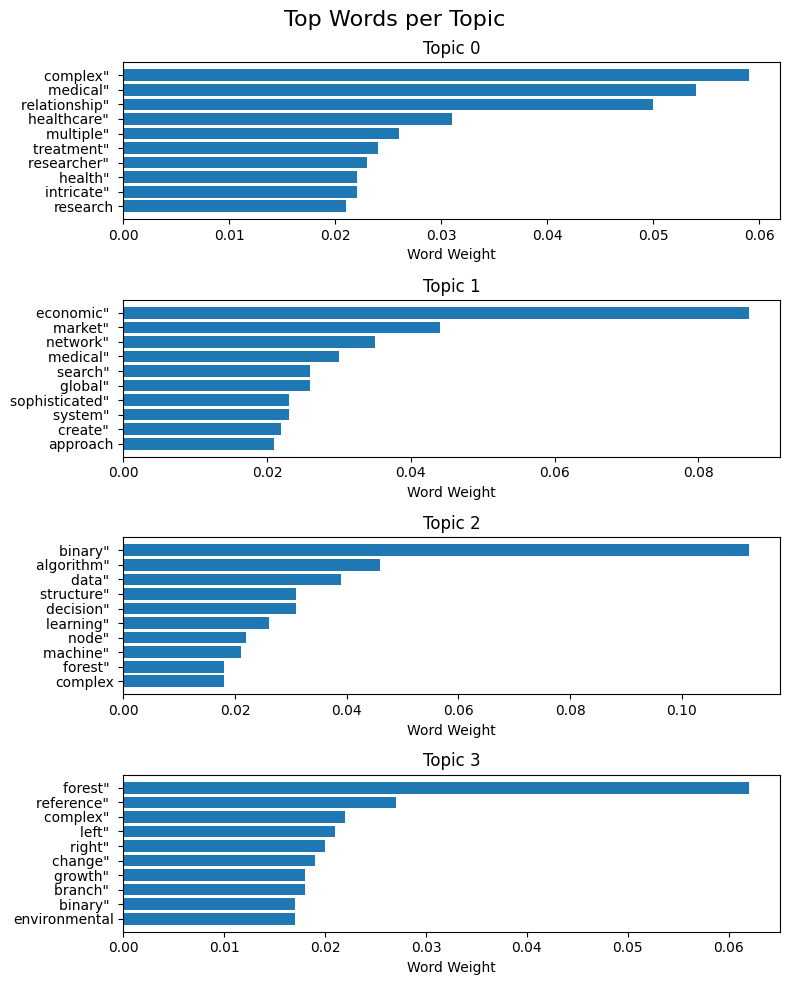

In [53]:
lda_trainer.visualize_topic_words( num_words=10, figsize=(8, 10))

In [14]:
embedder = bert_embed.BertEmbedder()
embeddings = embedder.get_embeddings(documents)

In [15]:
from umap import UMAP

umap_model = UMAP(n_neighbors=25, n_components=2, min_dist=0.0, metric='cosine')
umap_embedding = umap_model.fit_transform(embeddings)

In [40]:
topic_assignment = lda_trainer.predict_topics()
topic_assignment = np.argmax(topic_assignment, axis = 1)

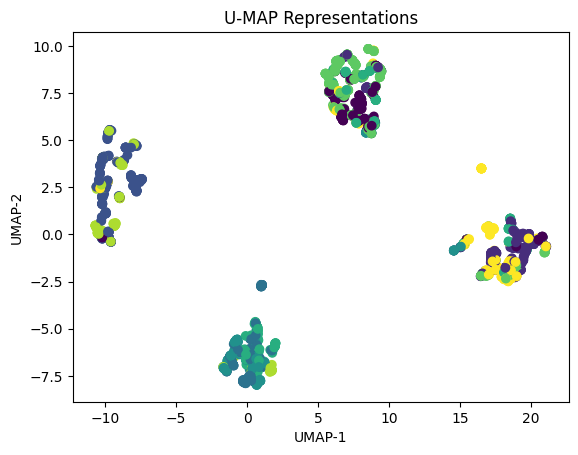

In [41]:
plt.scatter(umap_embedding[:, 0], umap_embedding[:,1], c = topic_assignment)
plt.title('U-MAP Representations')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

In [20]:
vector_similarities = calculate_similarities(embeddings)

In [21]:
metric_list = []
correlation_list = []
similarities = np.zeros((len(documents), len(documents), 9))
for topic_num in range(2,10):
    print(topic_num)
    model = lda_trainer.train_lda_model(num_topics=topic_num, passes = 25)
    topic_assignment = lda_trainer.predict_topics()
    metrics = evaluate_clustering(np.argmax(topic_assignment, axis =1), umap_embedding)
    metric_list.append(metrics)
    similarities[:,:, topic_num - 2] = calculate_similarities(topic_assignment)
    correlations= analyze_correlation(vector_similarities, similarities[:,:, topic_num - 2])
    correlation_list.append(correlations)
    

2024-11-27 10:57:51,933 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2024-11-27 10:57:51,934 : INFO : using serial LDA version on this node
2024-11-27 10:57:51,935 : INFO : running online (multi-pass) LDA training, 2 topics, 25 passes over the supplied corpus of 2000 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 50x with a convergence threshold of 0.001000


2


2024-11-27 10:57:53,082 : INFO : -6.146 per-word bound, 70.8 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 10:57:53,083 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 10:57:54,089 : INFO : optimized alpha [0.7501341, 0.680223]
2024-11-27 10:57:54,090 : INFO : topic #0 (0.750): 0.043*"binary" + 0.034*"complex" + 0.023*"economic" + 0.021*"relationship" + 0.019*"medical" + 0.019*"forest" + 0.018*"create" + 0.017*"reference" + 0.016*"intricate" + 0.015*"healthcare"
2024-11-27 10:57:54,091 : INFO : topic #1 (0.680): 0.033*"economic" + 0.028*"binary" + 0.027*"search" + 0.025*"medical" + 0.024*"complex" + 0.020*"network" + 0.020*"data" + 0.018*"forest" + 0.017*"market" + 0.014*"global"
2024-11-27 10:57:54,091 : INFO : topic diff=0.810778, rho=1.000000
2024-11-27 10:57:54,928 : INFO : -5.238 per-word bound, 37.7 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 10:57:54,929 : INFO : PROGRESS

3


2024-11-27 10:58:49,815 : INFO : -6.275 per-word bound, 77.5 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 10:58:49,816 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 10:58:50,799 : INFO : optimized alpha [0.26970792, 0.22596696, 0.39948592]
2024-11-27 10:58:50,800 : INFO : topic #0 (0.270): 0.040*"binary" + 0.028*"complex" + 0.025*"medical" + 0.024*"relationship" + 0.023*"healthcare" + 0.021*"reference" + 0.020*"intricate" + 0.017*"treatment" + 0.017*"create" + 0.016*"economic"
2024-11-27 10:58:50,800 : INFO : topic #1 (0.226): 0.035*"search" + 0.032*"economic" + 0.030*"medical" + 0.024*"data" + 0.022*"network" + 0.022*"binary" + 0.020*"global" + 0.017*"market" + 0.017*"forest" + 0.016*"sophisticated"
2024-11-27 10:58:50,801 : INFO : topic #2 (0.399): 0.041*"binary" + 0.036*"complex" + 0.032*"economic" + 0.025*"forest" + 0.019*"algorithm" + 0.018*"network" + 0.018*"market" + 0.017*"search" + 0.016*"medical" + 0.014*"relation

4


2024-11-27 10:59:47,515 : INFO : -6.356 per-word bound, 81.9 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 10:59:47,516 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 10:59:48,433 : INFO : optimized alpha [0.1576373, 0.13175811, 0.24166925, 0.16780844]
2024-11-27 10:59:48,433 : INFO : topic #0 (0.158): 0.049*"binary" + 0.031*"relationship" + 0.023*"healthcare" + 0.022*"complex" + 0.021*"intricate" + 0.021*"treatment" + 0.020*"medical" + 0.020*"reference" + 0.019*"economic" + 0.017*"genetic"
2024-11-27 10:59:48,434 : INFO : topic #1 (0.132): 0.043*"economic" + 0.035*"search" + 0.030*"data" + 0.027*"global" + 0.026*"network" + 0.024*"binary" + 0.024*"medical" + 0.022*"market" + 0.020*"sophisticated" + 0.016*"information"
2024-11-27 10:59:48,434 : INFO : topic #2 (0.242): 0.046*"binary" + 0.043*"economic" + 0.034*"complex" + 0.023*"market" + 0.022*"algorithm" + 0.021*"forest" + 0.019*"network" + 0.017*"decision" + 0.017*"search"

5


2024-11-27 11:00:43,889 : INFO : -6.418 per-word bound, 85.5 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 11:00:43,889 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 11:00:44,768 : INFO : optimized alpha [0.13177481, 0.108193435, 0.19257933, 0.1383903, 0.11563192]
2024-11-27 11:00:44,769 : INFO : topic #0 (0.132): 0.049*"binary" + 0.033*"relationship" + 0.022*"intricate" + 0.021*"medical" + 0.021*"economic" + 0.020*"complex" + 0.020*"healthcare" + 0.020*"treatment" + 0.019*"reference" + 0.018*"genetic"
2024-11-27 11:00:44,770 : INFO : topic #1 (0.108): 0.049*"economic" + 0.032*"data" + 0.032*"search" + 0.029*"network" + 0.029*"global" + 0.026*"medical" + 0.024*"market" + 0.022*"sophisticated" + 0.022*"binary" + 0.019*"analysis"
2024-11-27 11:00:44,770 : INFO : topic #2 (0.193): 0.047*"binary" + 0.044*"economic" + 0.034*"complex" + 0.025*"algorithm" + 0.023*"market" + 0.021*"forest" + 0.019*"network" + 0.018*"decision" + 0.01

6


2024-11-27 11:01:40,694 : INFO : -6.462 per-word bound, 88.1 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 11:01:40,694 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 11:01:41,543 : INFO : optimized alpha [0.10825618, 0.099392496, 0.14394473, 0.10668628, 0.099209495, 0.14478351]
2024-11-27 11:01:41,544 : INFO : topic #4 (0.099): 0.036*"search" + 0.034*"binary" + 0.033*"reference" + 0.025*"create" + 0.020*"economic" + 0.018*"network" + 0.017*"data" + 0.016*"approach" + 0.016*"continues" + 0.015*"complex"
2024-11-27 11:01:41,545 : INFO : topic #1 (0.099): 0.053*"economic" + 0.033*"search" + 0.032*"network" + 0.031*"medical" + 0.031*"global" + 0.028*"market" + 0.028*"data" + 0.028*"sophisticated" + 0.021*"analysis" + 0.020*"system"
2024-11-27 11:01:41,545 : INFO : topic #0 (0.108): 0.051*"binary" + 0.027*"relationship" + 0.025*"treatment" + 0.023*"healthcare" + 0.023*"reference" + 0.021*"intricate" + 0.019*"medical" + 0.019*"cre

7


2024-11-27 11:02:34,307 : INFO : -6.497 per-word bound, 90.3 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 11:02:34,307 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 11:02:35,120 : INFO : optimized alpha [0.09528535, 0.0838238, 0.11374262, 0.09297314, 0.091110505, 0.12402669, 0.12529117]
2024-11-27 11:02:35,120 : INFO : topic #1 (0.084): 0.039*"search" + 0.037*"economic" + 0.036*"data" + 0.034*"network" + 0.031*"global" + 0.028*"market" + 0.021*"forest" + 0.021*"binary" + 0.020*"sophisticated" + 0.019*"creates"
2024-11-27 11:02:35,121 : INFO : topic #4 (0.091): 0.045*"search" + 0.036*"reference" + 0.035*"binary" + 0.022*"economic" + 0.022*"create" + 0.020*"continues" + 0.020*"approach" + 0.019*"holistic" + 0.019*"innovation" + 0.016*"data"
2024-11-27 11:02:35,121 : INFO : topic #2 (0.114): 0.054*"binary" + 0.039*"economic" + 0.035*"algorithm" + 0.025*"complex" + 0.025*"forest" + 0.025*"market" + 0.023*"learning" + 0.022*"net

8


2024-11-27 11:03:31,339 : INFO : -6.533 per-word bound, 92.6 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 11:03:31,340 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 11:03:32,135 : INFO : optimized alpha [0.08881617, 0.08053796, 0.09984005, 0.088404536, 0.0826823, 0.11061127, 0.10937962, 0.095068246]
2024-11-27 11:03:32,136 : INFO : topic #1 (0.081): 0.047*"economic" + 0.043*"search" + 0.038*"global" + 0.035*"network" + 0.033*"market" + 0.029*"data" + 0.021*"information" + 0.020*"intricate" + 0.020*"medical" + 0.019*"sophisticated"
2024-11-27 11:03:32,136 : INFO : topic #4 (0.083): 0.048*"search" + 0.037*"binary" + 0.033*"reference" + 0.024*"create" + 0.022*"economic" + 0.021*"approach" + 0.020*"continues" + 0.020*"holistic" + 0.019*"innovation" + 0.016*"root"
2024-11-27 11:03:32,136 : INFO : topic #2 (0.100): 0.056*"binary" + 0.039*"economic" + 0.036*"algorithm" + 0.026*"market" + 0.023*"complex" + 0.021*"learning" + 0.021*

9


2024-11-27 11:04:25,303 : INFO : -6.568 per-word bound, 94.9 perplexity estimate based on a held-out corpus of 2000 documents with 27830 words
2024-11-27 11:04:25,303 : INFO : PROGRESS: pass 0, at document #2000/2000
2024-11-27 11:04:26,128 : INFO : optimized alpha [0.08207619, 0.075550735, 0.09235558, 0.07945907, 0.0790607, 0.10182906, 0.09939132, 0.08912033, 0.07788819]
2024-11-27 11:04:26,129 : INFO : topic #1 (0.076): 0.051*"economic" + 0.040*"global" + 0.040*"network" + 0.037*"market" + 0.036*"search" + 0.034*"data" + 0.025*"intricate" + 0.024*"information" + 0.022*"creates" + 0.021*"sophisticated"
2024-11-27 11:04:26,129 : INFO : topic #8 (0.078): 0.037*"binary" + 0.035*"economic" + 0.033*"search" + 0.029*"medical" + 0.025*"decision" + 0.023*"complex" + 0.019*"learning" + 0.019*"approach" + 0.018*"patient" + 0.017*"efficient"
2024-11-27 11:04:26,131 : INFO : topic #2 (0.092): 0.054*"binary" + 0.039*"economic" + 0.033*"algorithm" + 0.027*"market" + 0.027*"complex" + 0.025*"network

In [22]:
results = pd.DataFrame(metric_list)
results.index = range(2, 10)
results

,silhouette_score,calinski_harabasz,davies_bouldin
2,0.298105,832.664099,1.368277
3,0.345856,979.453924,1.387897
4,0.458672,2024.820389,1.221820
5,0.262893,867.311896,2.676885
6,0.224499,981.719763,4.752466
7,0.034257,483.549121,5.924408
8,-0.060056,707.500212,6.108188
9,-0.078295,715.608173,4.153090


In [23]:
resultscorr = pd.DataFrame(correlation_list)
resultscorr.index = range(2, 10)
resultscorr

,pearson_correlation,pearson_p_value,spearman_correlation,spearman_p_value,r_squared
2,0.333093,0.0,0.318940,0.0,0.110951
3,0.450007,0.0,0.428049,0.0,0.202507
4,0.680967,0.0,0.667356,0.0,0.463716
5,0.610637,0.0,0.601951,0.0,0.372878
6,0.565305,0.0,0.550247,0.0,0.319570
7,0.550292,0.0,0.528914,0.0,0.302822
8,0.526594,0.0,0.506578,0.0,0.277301
9,0.517668,0.0,0.492396,0.0,0.267980


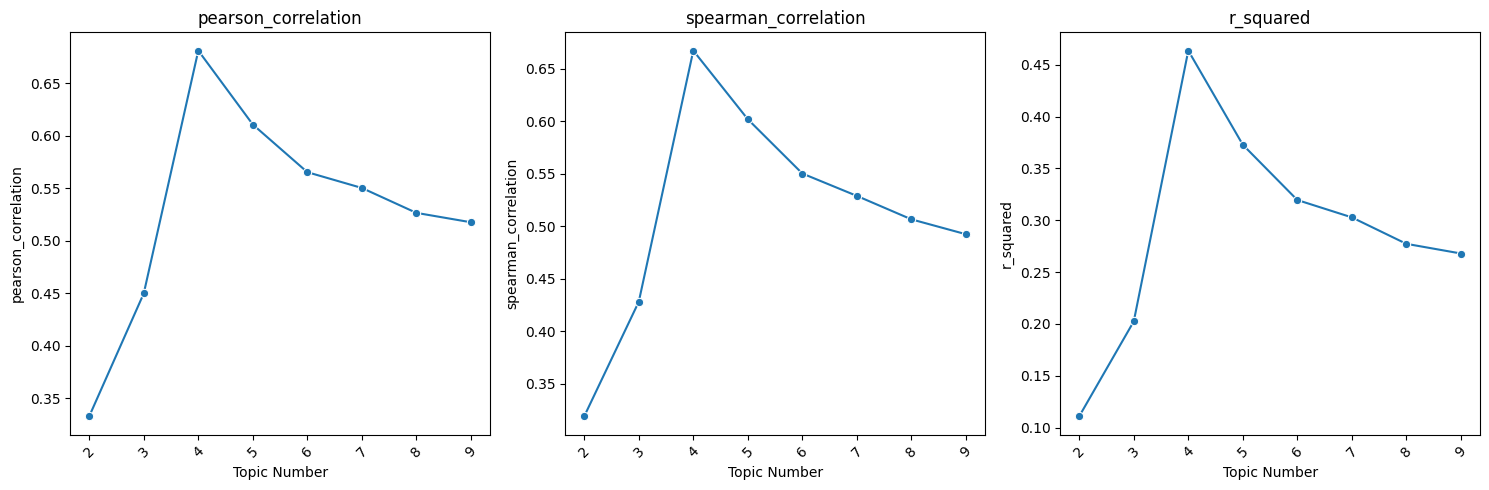

In [24]:
# Plot performance metrics
plt.figure(figsize=(15, 5))
for i, metric in enumerate(['pearson_correlation', 'spearman_correlation', 'r_squared'], 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=resultscorr, x=resultscorr.index, y=metric, marker='o')
    plt.title(f'{metric}')
    plt.xlabel('Topic Number')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

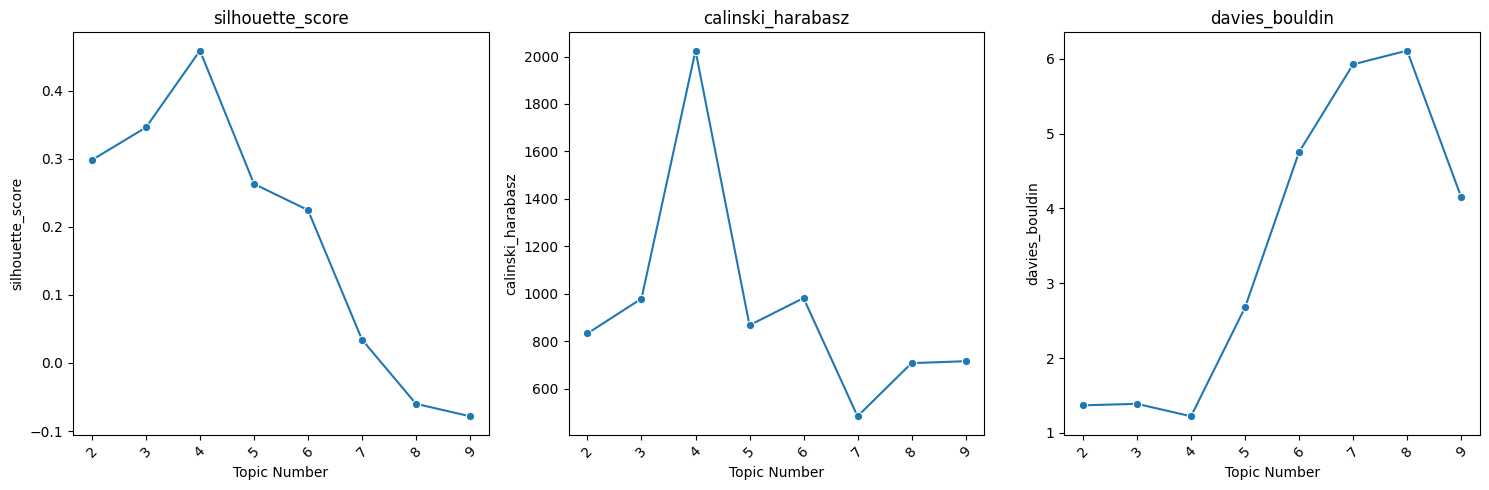

In [25]:
# Plot performance metrics
plt.figure(figsize=(15, 5))
for i, metric in enumerate(['silhouette_score', 'calinski_harabasz', 'davies_bouldin'], 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=results, x=results.index, y=metric, marker='o')
    plt.title(f'{metric}')
    plt.xlabel('Topic Number')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
